In [1]:
### Function Imports
from CorrFunctions import import_fx_data, plot_forex, corr_matrix, stacked_correlations, daily_rets_most_corr, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [2]:
### Load in FX Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
forex_pairs = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'AUDUSD=X']
start_date = '2023-07-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,EURUSD=X,GBPUSD=X,JPYUSD=X,AUDUSD=X
257,2024-06-26,1.070962,1.268400,0.006262,0.664480
258,2024-06-27,1.068011,1.262180,0.006226,0.664478
259,2024-06-28,1.070847,1.264574,0.006223,0.665060
260,2024-07-01,1.073526,1.264862,0.006215,0.667401
261,2024-07-02,1.073768,1.263887,0.006188,0.665079


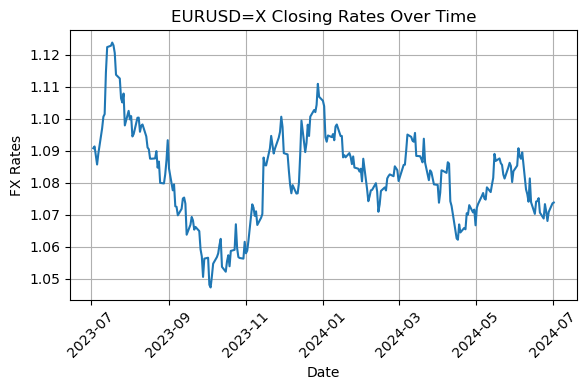

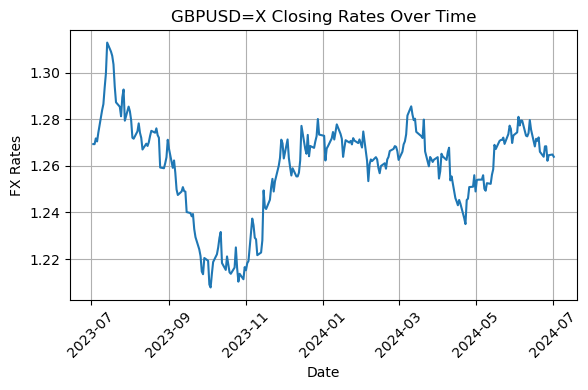

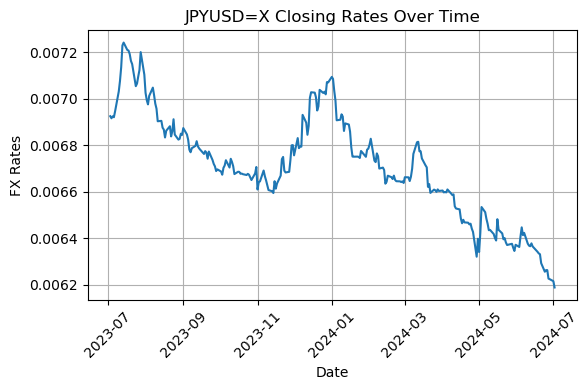

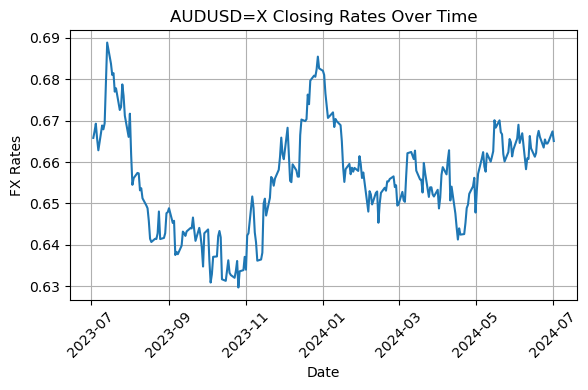

In [3]:
### Plot FX Rate Data
plot_forex(forex_data, forex_pairs)

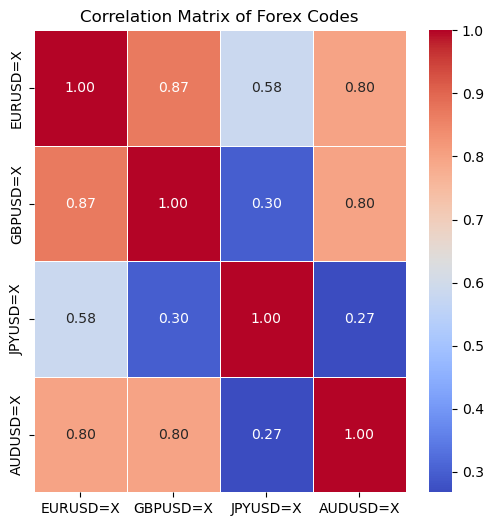

In [4]:
### Correlation Matrix Heatmap
corr_matrix(forex_data)

In [5]:
### Return Stacked Correlation -> Chose the forex pairs that are the most correlated (top of the list)
stacked_corr = stacked_correlations(forex_data)
print(stacked_corr.head(5))

EURUSD=X  GBPUSD=X    0.870596
GBPUSD=X  EURUSD=X    0.870596
          AUDUSD=X    0.799376
AUDUSD=X  GBPUSD=X    0.799376
          EURUSD=X    0.798184
dtype: float64


In [6]:
### Compute daily returns of Most Correlated Pairs
most_corr_pairs, returns = daily_rets_most_corr(forex_data)
print("Most correlated pairs:", most_corr_pairs)
returns.tail()


Most correlated pairs: ['EURUSD=X', 'GBPUSD=X']


,Date,EURUSD=X,GBPUSD=X
256,2024-06-26,-0.002153,0.000044
257,2024-06-27,-0.002755,-0.004904
258,2024-06-28,0.002656,0.001897
259,2024-07-01,0.002501,0.000228
260,2024-07-02,0.000226,-0.000771


In [7]:
### Compute VAR
# Calculate the 95% Value at Risk (VaR) for each currency pair
# Ex. When EURUSD=X: -0.008645, that means with 95% confidence, the most that the EURUSD rate is expected to 
# lose in one day is approximately 0.8645% of its value.
VaR = returns.quantile(0.05)
print("Value at Risk (95% Confidence level):\n", VaR)

Value at Risk (95% Confidence level):
 Date        2023-07-21 00:00:00
EURUSD=X              -0.006873
GBPUSD=X               -0.00718
Name: 0.05, dtype: object


In [8]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(most_corr_pairs, returns)
print("Hedge Ratio:", hedge_ratio)


Hedge Ratio: 0.8875318646099872


In [9]:
### Backtesting -> Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, most_corr_pairs, returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  -887.5319
Recent Hedged Cumulative Returns:  256    981.918811
257    983.486566
258    984.442702
259    986.706099
260    987.603852
dtype: float64
Recent Unhedged Cumulative Returns:  256    981.857900
257    979.152400
258    981.752762
259    984.208423
260    984.430393
Name: EURUSD=X, dtype: float64


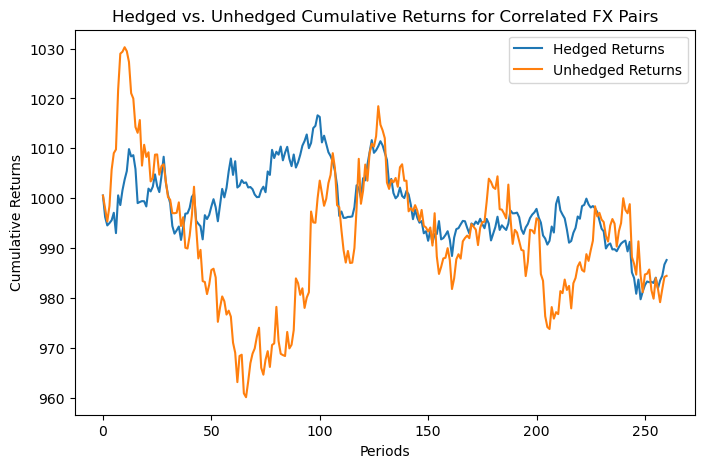

In [10]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [11]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, returns)

Metric                                  Hedged        Unhedged
Total Returns                         -12.3961        -15.5696
Annualized Returns                         nan             nan
Mean Return                           998.2713        991.8442
Standard Deviation                      7.2485         13.4350
Sharpe Ratio                         2186.2417       1171.9389

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 2186.2417,
which means for every unit of risk, the hedged portfolio is generating 2186.2417 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 1171.9389,
indicating that for every unit of risk, the unhedged portfolio is generating 1171.9389 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
